In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random
import importlib
import analysis.tests.non_parametric_test as test

importlib.reload(test)

random.seed(1)

%matplotlib inline

In [10]:
from analysis.utils import read_ticker

ticker = "SBER"
prices_by_day, time = read_ticker(ticker)
days = list(prices_by_day.keys())

In [11]:
n1 = []
n2 = []
r = []
for prices in prices_by_day.values():
    test.shrink(prices)
    new_n1, new_n2 = test.count_n1_n2(prices)
    new_run = test.count_runs(prices)
    n1.append(new_n1)
    n2.append(new_n2)
    r.append(new_run)
n1 = np.array(n1)
n2 = np.array(n2)
r = np.array(r)

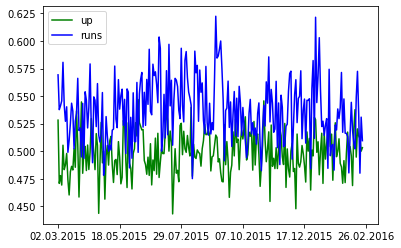

In [12]:
from analysis.utils import plot_with_days

plot_with_days(days)
plt.plot(n1 / (n1 + n2), color="green", label="up")
# plt.plot(n2 / (n1 + n2), color="red", label="down")
plt.plot(r / (n1 + n2), color="blue", label="runs")
plt.legend()
plt.show()

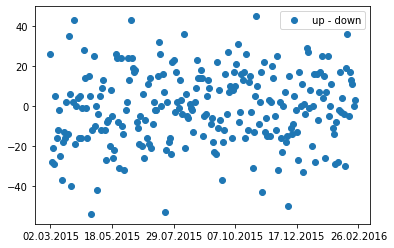

In [13]:
plot_with_days(days)
plt.plot(n1 - n2, "o", label="up - down")
plt.legend()
plt.show()

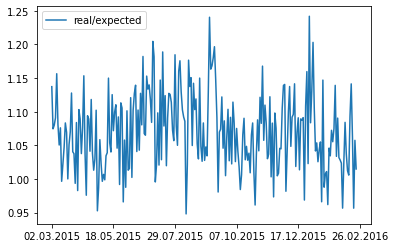

In [14]:
expected = 2 * n1 / (n1 + n2) * n2 + 1
s = np.sqrt(2 * n1  / (n1 + n2) * n2 / (n1 + n2) * (2 * n1 * n2 - n1 - n2) / (n1 + n2 - 1))
# print(n1 * n2 * (2 * n1 * n2 - n1 - n2))
plot_with_days(days)
plt.plot(r / expected, label="real/expected")
plt.legend()
plt.show()

In [15]:
import scipy.stats as st

z = (r - expected) / s
z_significant = st.norm.ppf(0.95)

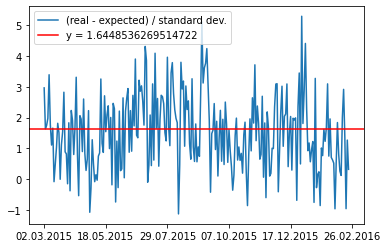

In [16]:
plot_with_days(days)
plt.plot(z, label="(real - expected) / standard dev.")
plt.axhline(y=z_significant, color="red", label=f"y = {z_significant}")
plt.legend()
plt.show()